# Evolution of maximum radial velocity in the convection zone

In [1]:
%pylab 
import nugridpy.utils as utils
from ppmpy import ppm
import numpy as np
import matplotlib.pyplot as pl
%matplotlib nbagg

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [17]:
def get_v_evolution(prof, cycles, r1, r2, comp, RMS):

    r = prof.get('Y', fname = cycles[0], resolution = 'l')
    idx1 = np.argmin(np.abs(r - r1))
    idx2 = np.argmin(np.abs(r - r2))

    t = np.zeros(len(cycles))
    v = np.zeros(len(cycles))
    for k in range(len(cycles)):
        t[k] = prof.get('t', fname = cycles[k], resolution = 'l')[-1]
        if comp == 'radial':
            v_rms  = prof.get('EkY', fname = cycles[k], resolution = 'l')**0.5
        elif comp == 'tangential':
            v_rms  = prof.get('EkXZ', fname = cycles[k], resolution = 'l')**0.5
        if RMS == 'mean':
            v[k] = np.mean(v_rms[idx2:idx1])
        elif RMS == 'min':
            v[k] = np.min(v_rms[idx2:idx1])
        elif RMS == 'max':
            v[k] = np.max(v_rms[idx2:idx1])                
    return t, v

In [38]:
def v_evolution(cases, ymin, ymax, comp, RMS, sparse = 1, markevery = 25):

    '''
    Compares the time evolution of the max RMS velocity of different runs

    Plots Fig. 12 in paper: "Idealized hydrodynamic simulations
    of turbulent oxygen-burning shell convection in 4 geometry"
    by Jones, S.; Andrassy, R.; Sandalski, S.; Davis, A.; Woodward, P.; Herwig, F.
    NASA ADS: http://adsabs.harvard.edu/abs/2017MNRAS.465.2991J

    Parameters
    ----------
    cases : string array
        directory names that contain the runs you wish to compare
        assumes ppm.set_YProf_path was used, thus only the directory name
        is necessary and not the full path ex. cases = ['D1', 'D2']
    ymin, ymax : float
        Boundaries of the range to look for vr_max in

    '''
    sparse = 1
    markevery = 25
    cb = utils.colourblind
    ls = utils.linestylecb
    yy = 0
    for case in cases:

        try:
            prof = ppm.yprofile(ppm.ppm_path+case)
        except ValueError:
            print "have you set the yprofile filepath using ppm.set_YProf_path?"

        cycles = range(prof.cycles[0], prof.cycles[-1], sparse)
        t, vr_max = get_v_evolution(prof, cycles, ymin, ymax, comp, RMS)
        pl.plot(t/60.,  1e3*vr_max,  color = cb(yy),\
                 marker = ls(yy)[1], markevery = markevery, label = case)
        yy += 1

    pl.title('')
    pl.xlabel('t / min')
    pl.ylabel(r'v$_r$ / km s$^{-1}$')
    pl.legend(loc = 0)

Reading attributes from file  YProfile-01-0209.bobaaa
Analyzing headers ...
There are 210 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-M25/D15 directory.
Ndump values range from 0 to 209
Time values range from 8.87622 to 1864.01


<IPython.core.display.Javascript object>


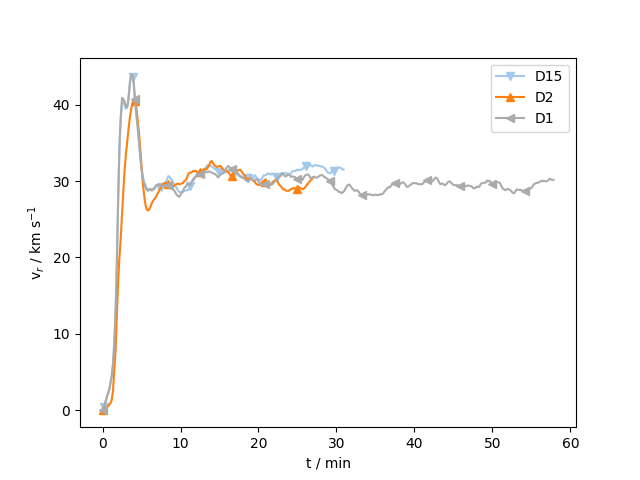

Reading attributes from file  YProfile-01-0163.bobaaa
Analyzing headers ...
There are 164 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-M25/D2 directory.
Ndump values range from 0 to 163
Time values range from 0.0 to 1640.0
Reading attributes from file  YProfile-01-0348.bobaaa
Analyzing headers ...
There are 349 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-M25/D1 directory.
Ndump values range from 0 to 348
Time values range from 0.0 to 3480.0


In [39]:
ppm.set_YProf_path('/data/ppm_rpod2/YProfiles/O-shell-M25/',YProf_fname='YProfile-01-0000.bobaaa')
v_evolution(['D15','D2','D1'], 4., 8.,'max','radial')